# Visualization of Time-series data


In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [168]:
log = pd.read_csv('Sunil_Log.csv')

In [169]:
log.columns

Index(['time1', 'labels1', 'time2', 'labels2', 'time3', 'labels3', 'time4',
       'labels4', 'time5', 'labels5', 'time6', 'labels6', 'time7', 'labels7'],
      dtype='object')

## Plot-1: plotting stimuli over time with dot

In [184]:
def recomputeTime(log,exp_no):
    """
    This function recomputes the time for each log file considering start time as 0.
    
    log    : pandas dataframe of log file,
    exp_no : experiment number
    """
    
    col_name = 'time' + str(exp_no)
    
    rst_label = 'time'+str(exp_no)+'_sec'
    
    log['time1_date'] = pd.to_datetime(log[col_name])
    log['time1_date2'] = log['time1_date'] - log['time1_date'].to_list()[0]
    log[rst_label] = log['time1_date2'].dt.seconds
    
    return log.loc[:,[rst_label,'labels1','time1_date']]

In [148]:
def plotExperimentPlot1(log,exp_no,save=False):
    """
    This function plot the stimuli on y-axis and time on x-axis.
    
    log    : pandas dataframe of log file.
    exp_no : experiment number
    """
    log_df = recomputeTime(log,exp_no)
    figure_title = 'Experiment ' + str(exp_no)
    sns.set(rc = {'figure.figsize':(10,4)})
    sns.set_theme(style="white", palette=None)
    
    sns.catplot(x='time1_sec',y='labels1',data=log,order=['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'][::-1])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stimuli')
    plt.title(figure_title)
    plt.tight_layout()
    if save:
        file = 'type_1_experiment_'+str(exp_no)+'.png'
        plt.savefig(file,format='png')
    else:
        plt.show()
    

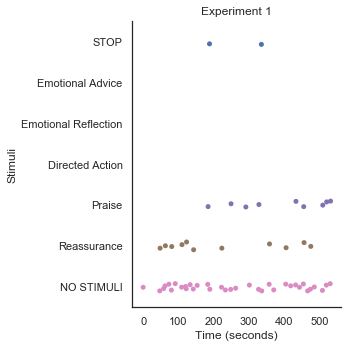

In [151]:
plotExperimentPlot1(log,1)


# Plot-2: plotting with connected lines

In [71]:
log['labels1'].unique()

array(['NO STIMULI', 'Reassurance', 'Praise', 'STOP'], dtype=object)

In [107]:
log['labels4'].unique()

array(['NO STIMULI', 'Directed Action', nan], dtype=object)

In [159]:
def plotExperimentPlot2(log,i,save=False):
    """
    This function plots one experiment plot.
    log    : pandas dataframe of log file.
    i : experiment number
    """
    plt.figure()
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    plt.plot(log_df[time_label],label,label=exp_label)
    plt.title(exp_label)
    plt.yticks([1,2,3,4,5,6,7],['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stimuli')
    plt.tight_layout()
    if save:
        file = 'type_2_experiment_'+str(i)+'.png'
        plt.savefig(file,format='png')
    else:
        plt.show()


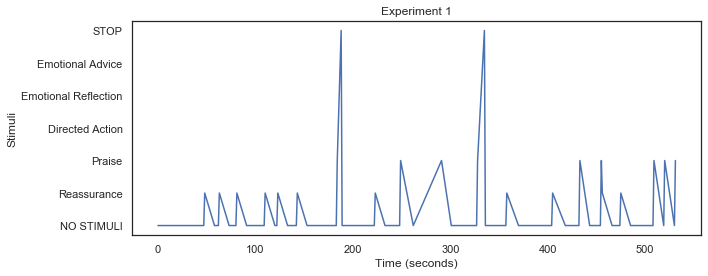

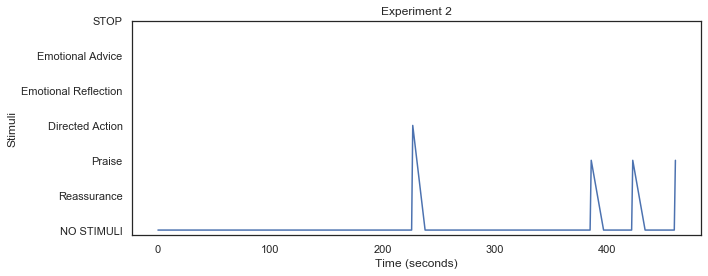

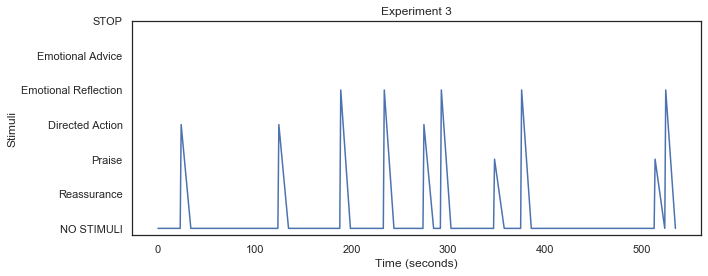

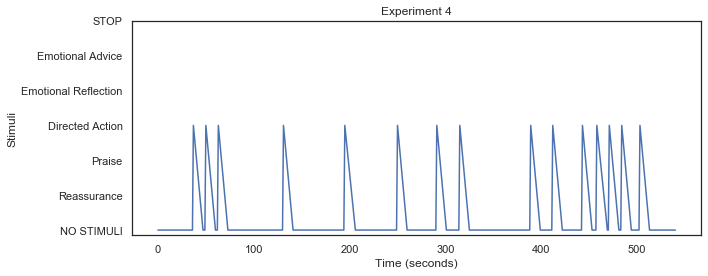

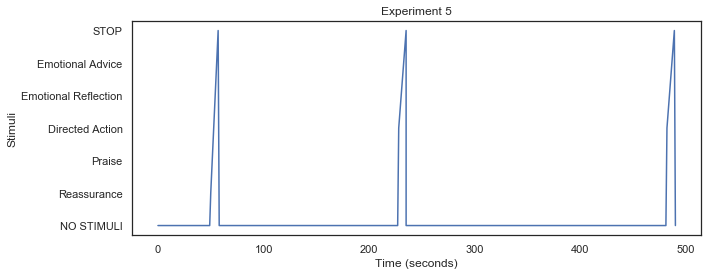

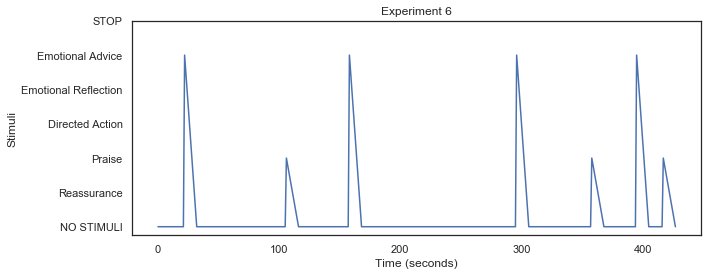

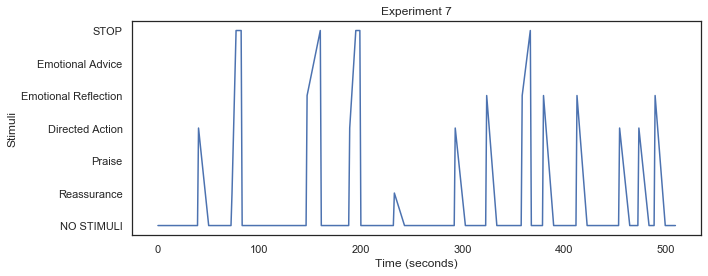

In [160]:
for i in range(1,8):
    plotExperimentPlot2(log,i,True)

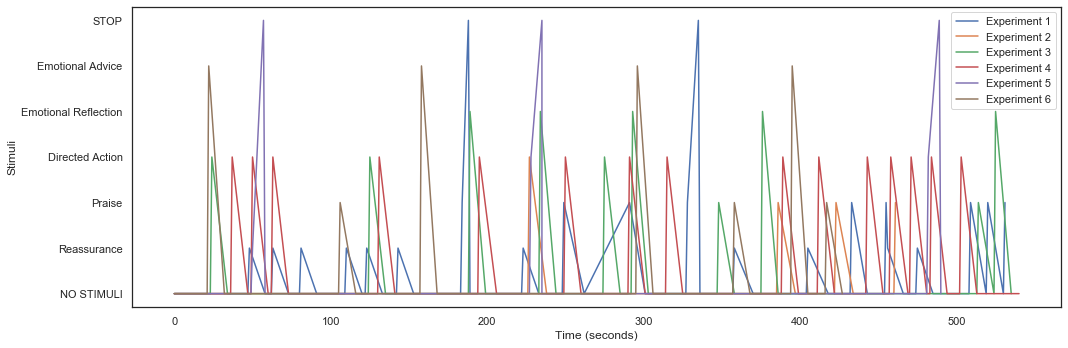

In [165]:
# plot all plots of type2 for experiment

plt.figure(figsize=(15,5))
for i in range(1,7):
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    plt.plot(log_df[time_label],label,label=exp_label)
plt.yticks([1,2,3,4,5,6,7],['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])

plt.xlabel('Time (seconds)')
plt.ylabel('Stimuli')
plt.legend()
plt.tight_layout()
plt.savefig('type_2_all_experiment.png',format='png')
plt.show()

### Plotting all experiments using type-2 plot

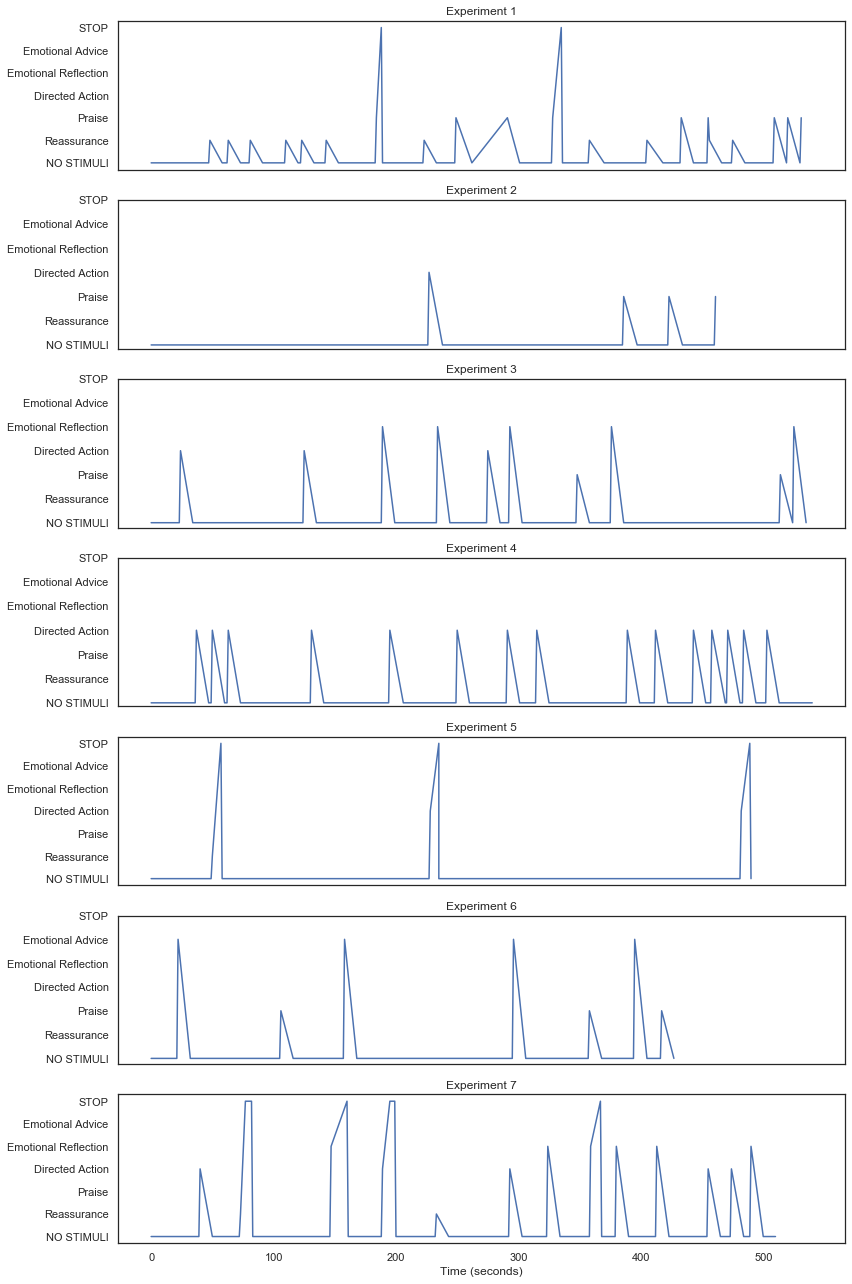

In [166]:

fig, ax = plt.subplots(7,figsize=(12,18),sharex=True)

for i in range(1,8):
    exp_label = 'Experiment ' + str(i)
    time_label = 'time'+str(i)+'_sec'
    stimuli_label = 'labels'+str(i)
    
    log_df = recomputeTime(log,i)
    label = log_df[stimuli_label].map({'NO STIMULI':1, 'Reassurance':2, 'Praise':3,'Directed Action':4,'Emotional Reflection':5, 'Emotional Advice':6,'STOP':7})
    figure_title = 'Experiment ' + str(1)
    ax[i-1].plot(log_df[time_label],label)
    ax[i-1].set_yticks([1,2,3,4,5,6,7])
    ax[i-1].set_yticklabels(['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice','STOP'])

    ax[i-1].set_title(exp_label)

    
plt.xlabel('Time (seconds)')

plt.tight_layout()
plt.savefig('type_2_all_experiment_verticle.png',format='png')
plt.show()

# Plot-3: Plotting aggregated stimuli for each minute

In [371]:
def countFrequencyAndRecomputeTime(log,exp_no,time_window):
    """
    This function recomputes the time for each log file considering start time as 0.
    
    log    : pandas dataframe of log file,
    exp_no : experiment number
    """
    
    col_name = 'time' + str(exp_no)
    lab_name = 'labels'+str(exp_no)
    
    
    log['timestamp'] = pd.to_datetime(log[col_name])
    log['label'] = log[lab_name]
    
    
    log_df = log.loc[:,['timestamp','label']]
    
    #create dummy variables
    log_dummy = pd.get_dummies(log_df)
    
    #setting index
    log_dummy.set_index(log_dummy['timestamp'],inplace=True)
    
    # count frequency for every 
    fre_df = log_dummy.resample(time_window).sum()
    
    # new frame numbers
    fre_df['frame'] = list(range(1,fre_df.shape[0]+1)) 
    #fre_df.set_index(fre_df['frame'],inplace=True)

    
    return fre_df

def plotExperimentplot3(log,exp_no,time_window='60S'):
    """
    This function plot all experiments with type-3 plot.
    
    log: pandas data frame of log file.
    exp_no : experiment number
    time_window: time window to aggregate stimuli.
    
    """

    pr_df = countFrequencyAndRecomputeTime(log,exp_no,time_window)
    
    stimuli_types = ['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice']
    
    for stimuli in stimuli_types:
        
        stimuli_label = 'label_' + stimuli
        if stimuli_label not in pr_df.columns or stimuli == 'NO STIMULI':
            continue
        
    
        x = pr_df['frame']
        y = pr_df[stimuli_label]

        xnew = np.linspace(x.min(), x.max(), 200) 

        #define spline
        spl = make_interp_spline(x, y, k=2)
        y_smooth = spl(xnew)
        
        x_dot = pr_df.loc[pr_df[stimuli_label] !=0,'frame']
        y_dot = pr_df.loc[pr_df[stimuli_label] !=0,stimuli_label]
        

        plt.plot(xnew,y_smooth,label=stimuli)
        plt.scatter(x_dot,y_dot,marker="o")
    plt.xlabel('Time (Sec.)')
    plt.yticks(range(0,7),list(range(0,7)))
    plt.ylabel('Frequency')
    plt.ylim(ymin=0)
    plt.xticks(x,x*30)
    plt.title('Experiment-%d'%exp_no)
    file = 'type_3_experiment_'+str(i)+'_'+time_window_label +'.png'
    plt.savefig(file,format='png')
    plt.show()

In [378]:
log = pd.read_csv('Sunil_Log.csv')

for ts in ['30S','60S','120S','150S','180S']:
    for i in range(1,8):
        exp = str(i)
        pr_df = countFrequencyAndRecomputeTime(log,6,'30S')
        file_name = 'Experiment_%s_time_window_%s.csv'%(exp,ts)
        pr_df.to_csv(file_name,index=False)


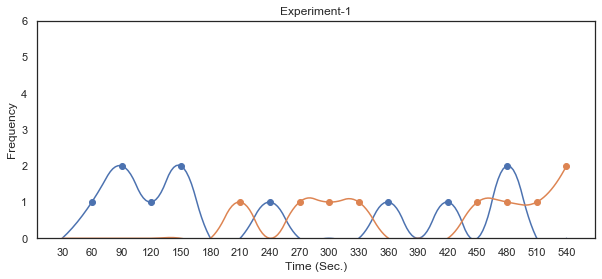

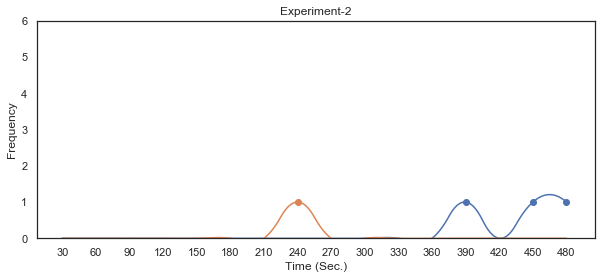

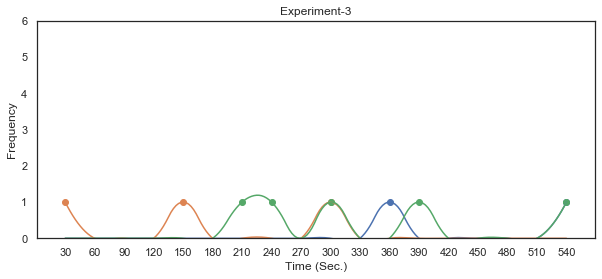

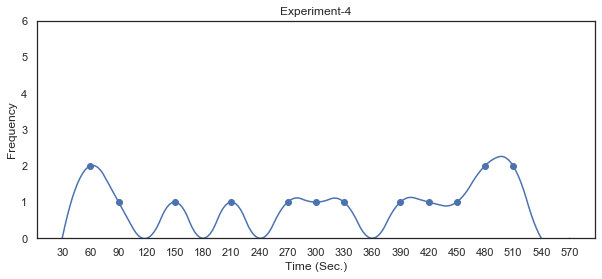

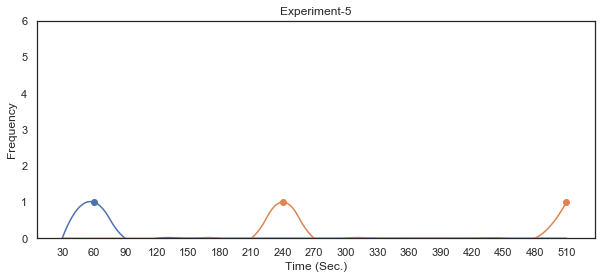

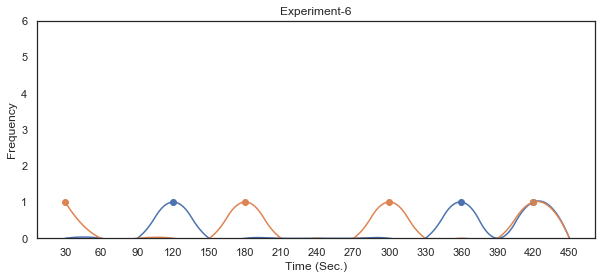

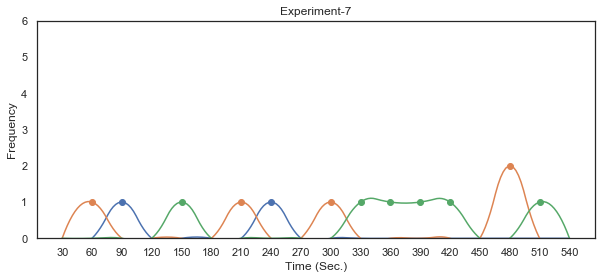

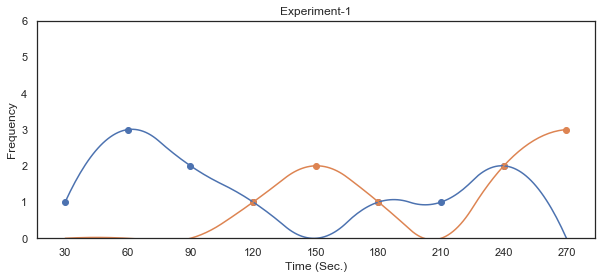

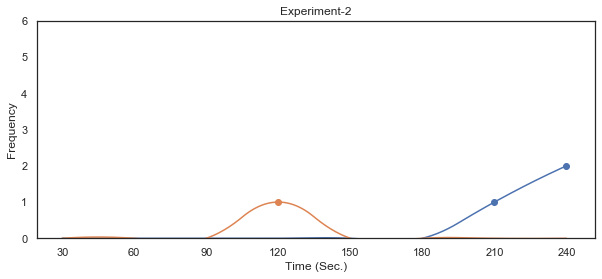

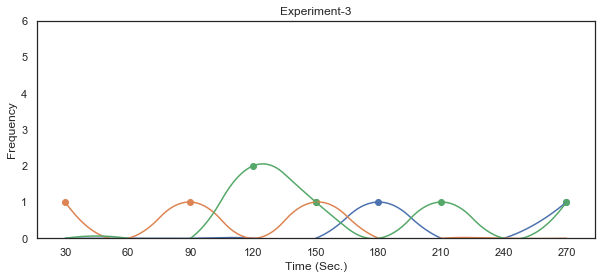

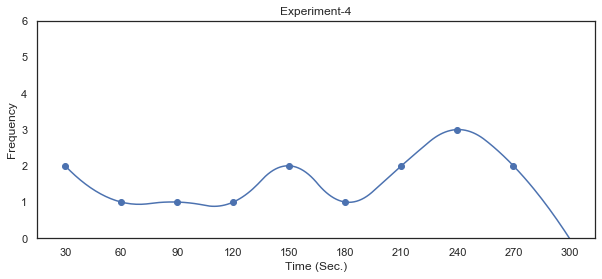

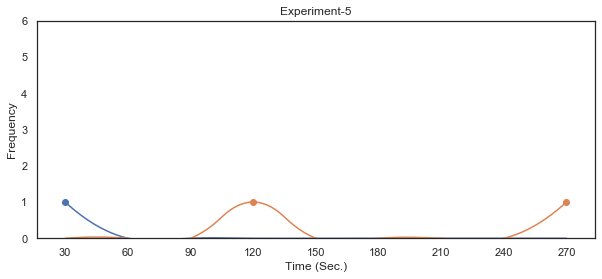

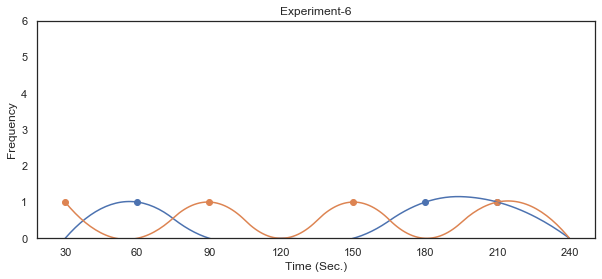

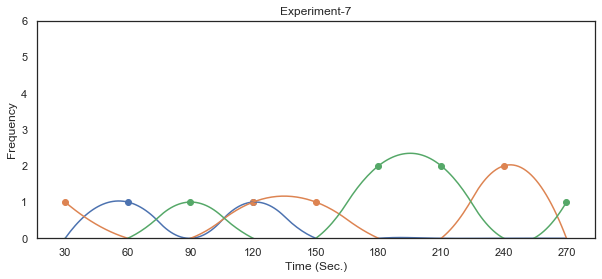

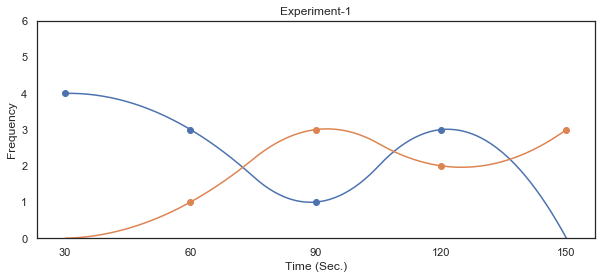

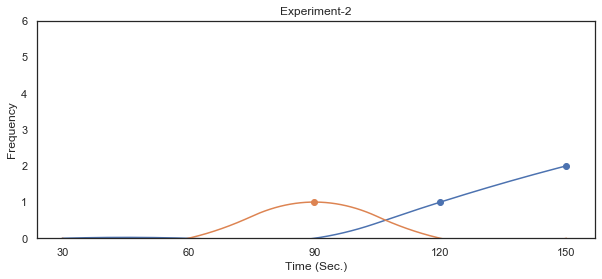

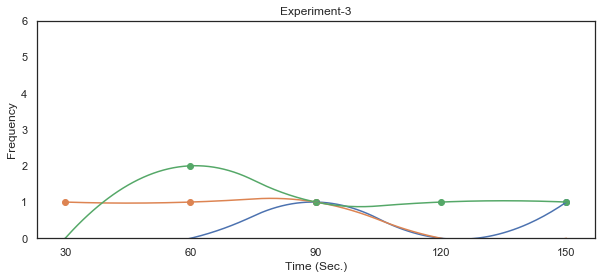

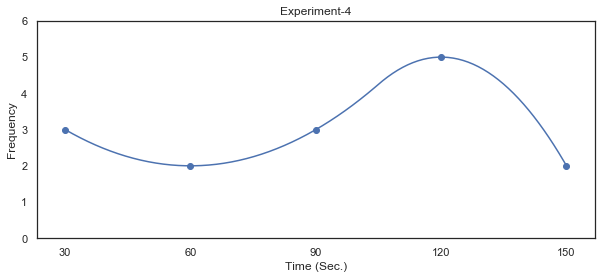

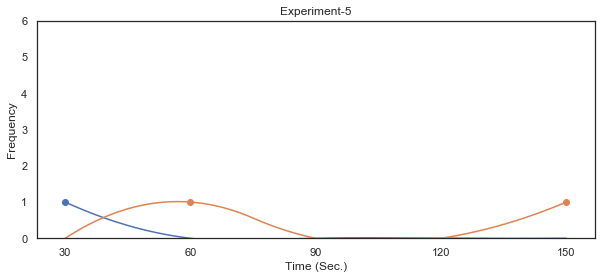

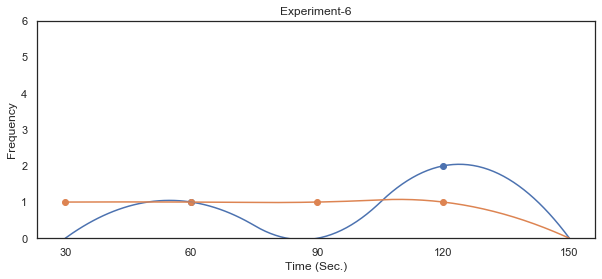

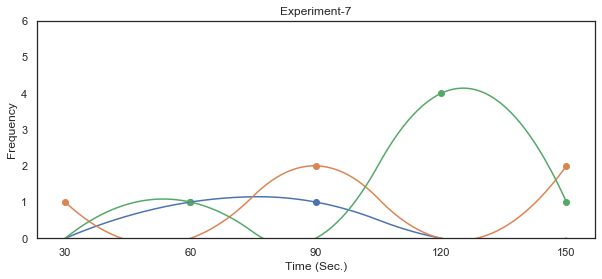

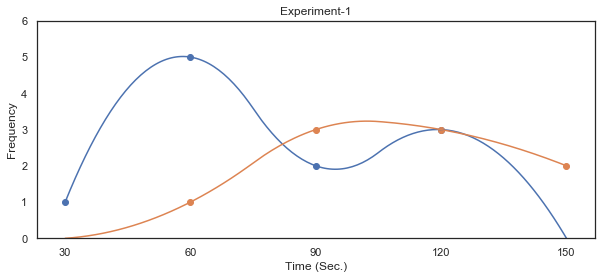

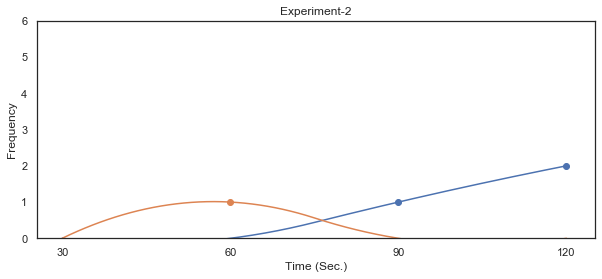

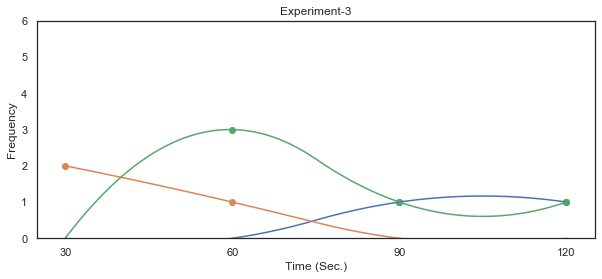

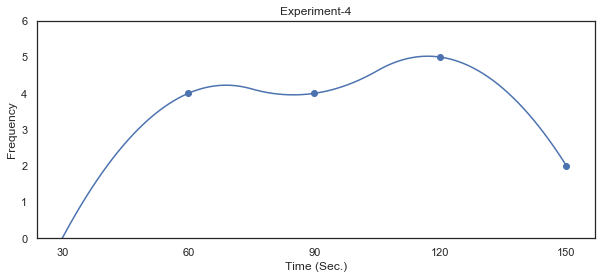

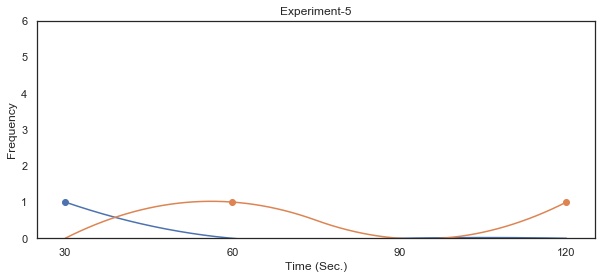

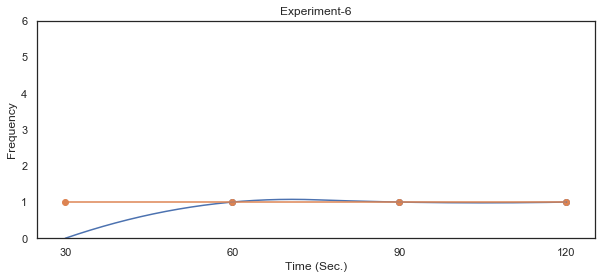

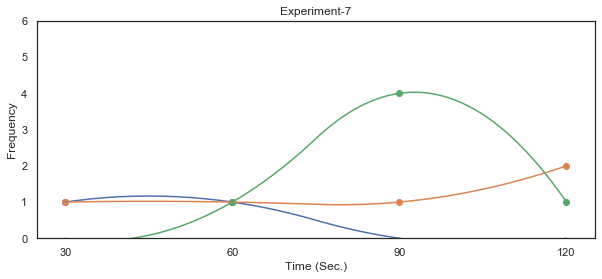

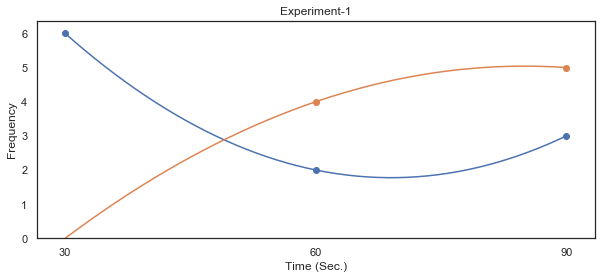

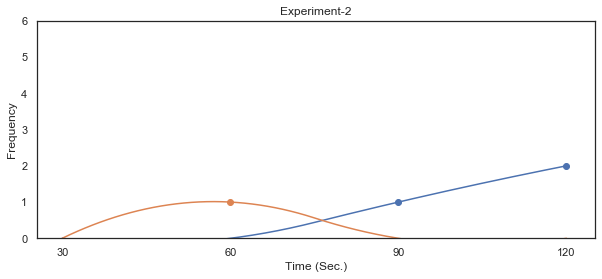

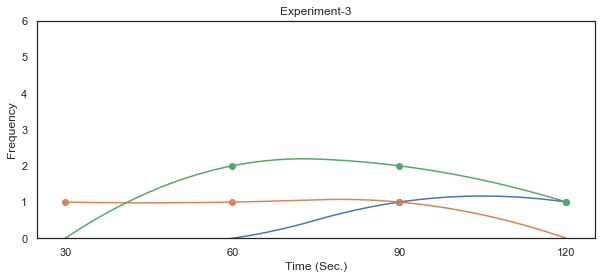

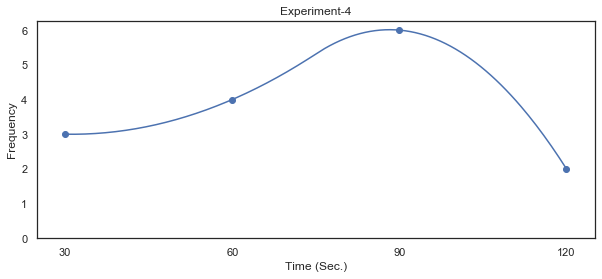

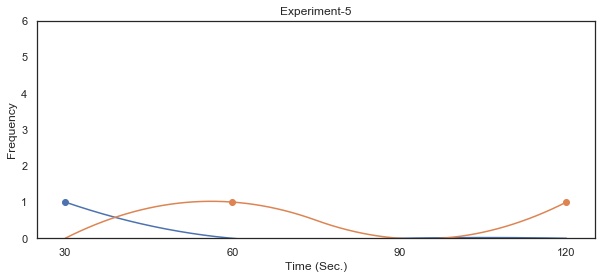

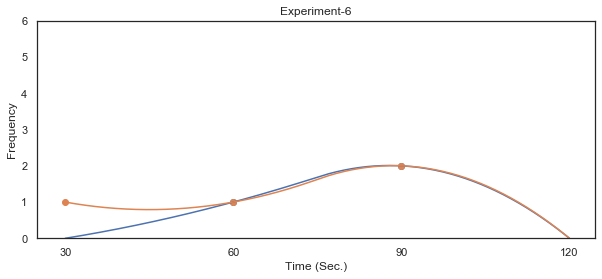

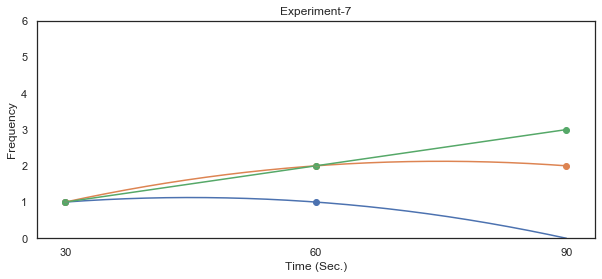

In [375]:
for ts in ['30S','60S','120S','150S','180S']:
    for i in range(1,8):
        plotExperimentplot3(log,i,ts)

### plotting all plots with type 3

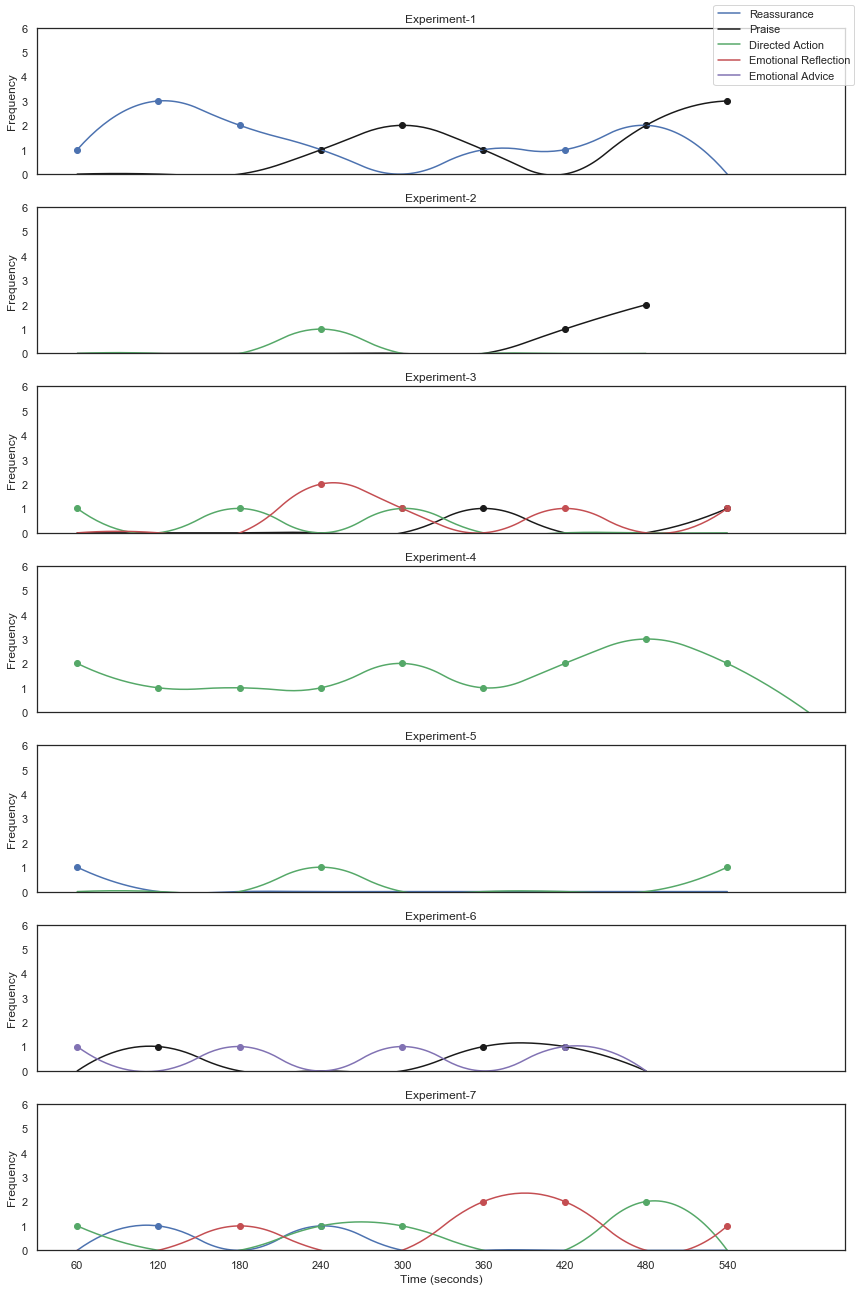

In [370]:

colors = {'Reassurance':'b', 'Praise':'k', 'Directed Action':'g','Emotional Reflection':'r','Emotional Advice':'m'}

fig, ax = plt.subplots(7,figsize=(12,18),sharex=True)

# You can change time window in seconds
time_window = 60

time_window_label = str(time_window)+"S"

for i in range(1,8):
    pr_df = countFrequencyAndRecomputeTime(log,i,time_window_label)
    
    stimuli_types = ['NO STIMULI', 'Reassurance', 'Praise', 'Directed Action','Emotional Reflection','Emotional Advice']
    
    for stimuli in stimuli_types:
        
        stimuli_label = 'label_' + stimuli
        if stimuli_label not in pr_df.columns or stimuli == 'NO STIMULI':
            continue
        
    
        x = pr_df['frame']
        y = pr_df[stimuli_label]

        xnew = np.linspace(x.min(), x.max(), 200) 

        #define spline
        spl = make_interp_spline(x, y, k=2)
        y_smooth = spl(xnew)
        
        x_dot = pr_df.loc[pr_df[stimuli_label] !=0,'frame']
        y_dot = pr_df.loc[pr_df[stimuli_label] !=0,stimuli_label]
        

        ax[i-1].plot(xnew,y_smooth,label=stimuli,color=colors[stimuli])
        ax[i-1].scatter(x_dot,y_dot,marker="o",color=colors[stimuli])

        

    ax[i-1].set_yticks(range(0,7),list(range(0,7)))
    ax[i-1].set_ylabel('Frequency')
    ax[i-1].set_ylim(ymin=0)
    ax[i-1].set_xticks(x)
    ax[i-1].set_xticklabels(x*time_window)
    ax[i-1].set_title('Experiment-%d'%i)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

new_lines = []
new_labels = []

for line,label in zip(lines,labels):

    if label not in new_labels:
        new_lines.append(line)
        new_labels.append(label)

# finally we invoke the legend (that you probably would like to customize...)

fig.legend(new_lines, new_labels)
    
plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.savefig('type_3_all_experiment_%s.png'%time_window_label,format='png')
plt.show()